In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PYTHON PROJECTS/Heart Attack Forecasting/heart.csv',
                   sep=',', encoding='iso-8859-1')

## **Data Exploration**

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

## **1.Analyzing the Variables (atributes)**

In [ ]:
data['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
data['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
hist1 = px.histogram(data, x = "Age", nbins=95)
hist1.update_layout(width=500, height=300, title_text='Distribuição das idades')
hist1.show()

<Axes: xlabel='Age', ylabel='Count'>

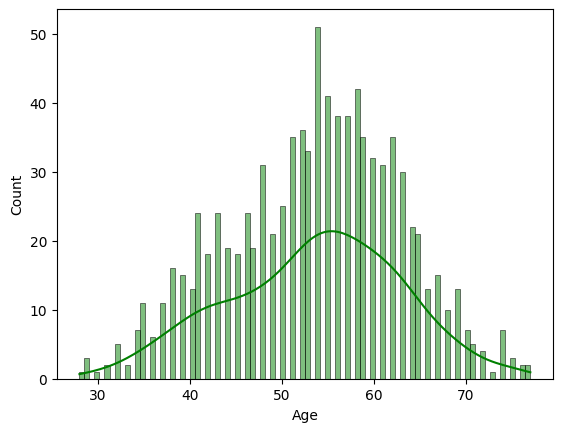

In [ ]:
sns.histplot(data, x='Age', stat='count', bins=90, color="green", kde=True) #kde é linha de tendência

In [ ]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

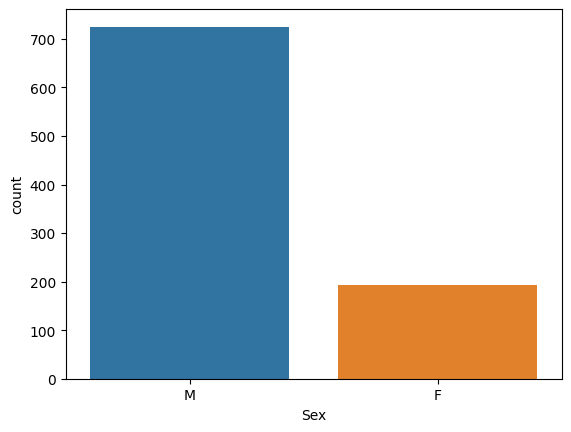

In [ ]:
sns.countplot(x='Sex', data=data);

## **Types of Chest Pain**

ASY: asymptomatic.

NAP: non-anginal pain.

ATA: atypical angina.

TA: typical angina.

In [ ]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

## **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [ ]:
data.RestingBP.value_counts().sort_index()

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

<Axes: xlabel='RestingBP', ylabel='Count'>

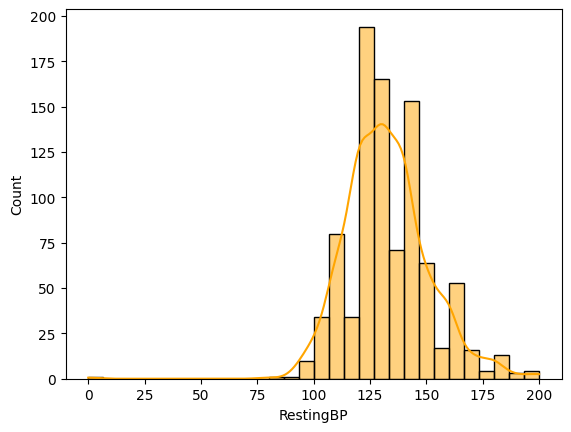

In [ ]:
sns.histplot(data, x="RestingBP", stat="count", kde=True, bins=30, color="orange") #bins = grossura da barra

## **Cholesterol = colesterol sérico (mg/dl)**

In [48]:
data.Cholesterol.value_counts().sort_index()

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

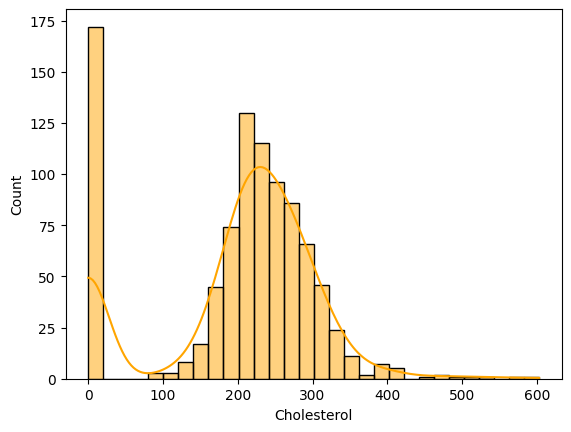

In [49]:
sns.histplot(data, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

## **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

In [50]:
data.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

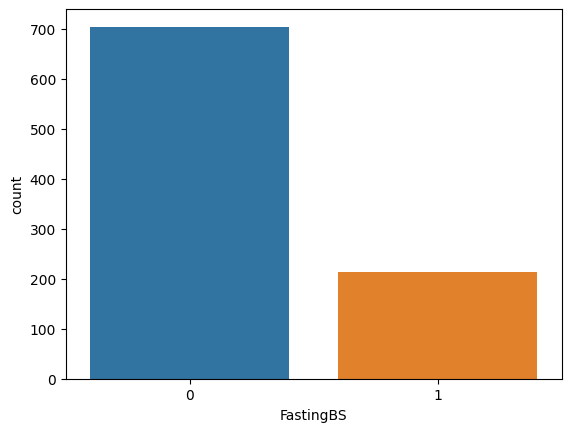

In [51]:
sns.countplot(x='FastingBS', data=data);

## **Resting ECG = eletrocardiograma em repouso**

Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

In [52]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

SEGMENTO ST: Qualquer desnível do segmento ST, para cima (supradesnível) ou para baixo (infradesnível), deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

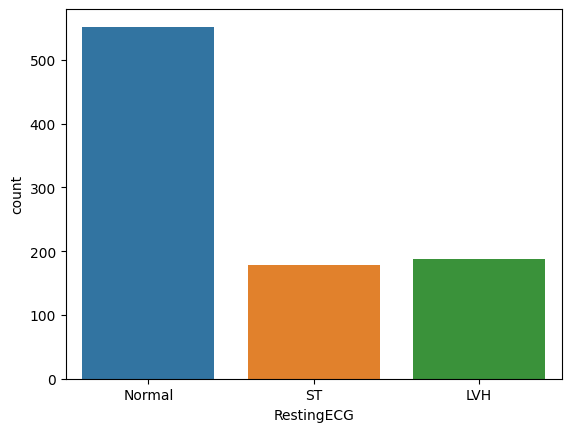

In [54]:
sns.countplot(x='RestingECG', data=data);

# **Max HR (heart rate) = frequência cardíaca máxima**

In [55]:
data['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

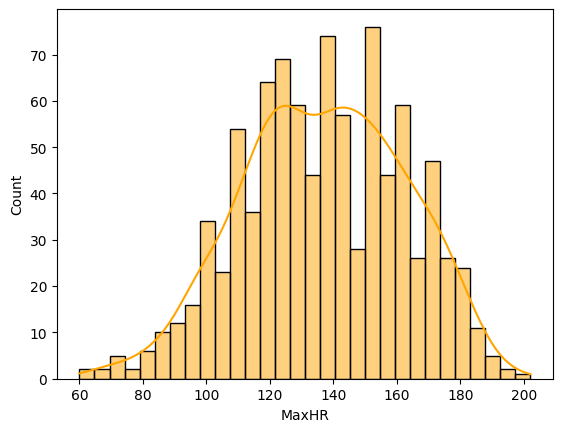

In [56]:
sns.histplot(data, x='MaxHR', bins=30, color="orange", kde=True, stat="count");

## **Exercise Angina = Angina induzida por exercício**

In [57]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [58]:
px.pie(data, 'ExerciseAngina')

## **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

In [59]:
data['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

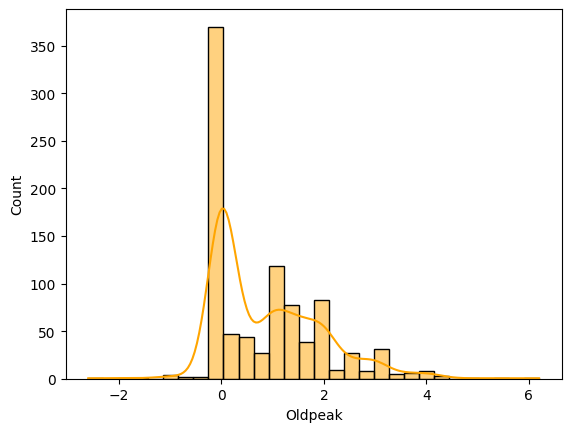

In [60]:
sns.histplot(data, x='Oldpeak', bins=30, color="orange", kde=True, stat="count");

## **ST_Slope = Inclinação do segmento ST no ECG**

Flat = plano

Up = para cima

Down = para baixo

In [61]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [62]:
px.pie(data, 'ST_Slope')

## **Heart Disease**

0 = Does not have any heart disease

1 = Do have a heart disease

In [63]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [64]:
px.pie(data, 'HeartDisease')

## **2.Data Cleaning**

In [65]:
data.dtypes # object: strings

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [67]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
# data2 = data.dropna() #create a new table without missing values, in this casa doesn't have any
# data2['Age'].fillna(data2['Age'].mean(), inplace=True) #replace the missing values with an media
# data2['Age'].fillna(10, inplace=True) #replace the missing values with any other value

## **Analysis of descriptive statistics**

In [72]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [73]:
data.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


## **Handling inconsistent values**

In [74]:
data = data.loc[data.RestingBP != 0] #delete pressure values equal to zero

In [75]:
data.shape

(917, 12)

In [76]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [77]:
data.Cholesterol.mean() #Replace Cholesterol zeros values by the average without the zeros

199.0163576881134

In [78]:
data.Cholesterol.replace(0, np.NaN, inplace=True)

<ipython-input-78-0ca464979786>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
data.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [80]:
data.Cholesterol.mean()

244.6353887399464

In [82]:
data['Cholesterol'].fillna(data['Cholesterol'].mean(), inplace=True) #replace missing values for the average value

<ipython-input-82-af7f41ef5c27>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.isnull().sum()

In [83]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [84]:
data.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


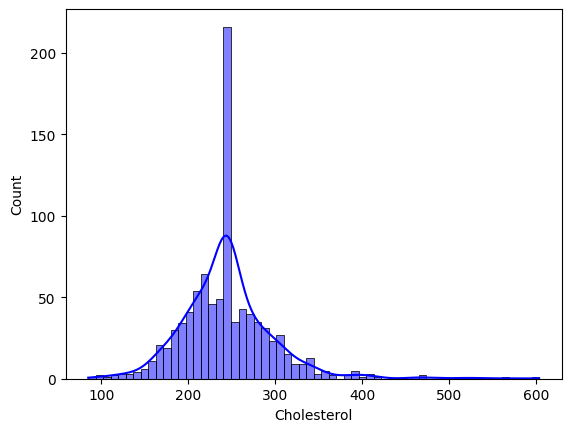

In [90]:
sns.histplot(data, x='Cholesterol', bins=60, color="blue", kde=True, stat="count");

## **Outliers Analysis**

In [91]:
px.box(data, y='Age') #age

In [92]:
px.box(data, y='RestingBP') # Blood pressure resting

In [93]:
px.box(data, y='Cholesterol') #cholesterol

In [94]:
px.box(data, y='MaxHR') #maximum heart frequency

## Exporting the dataset

In [95]:
data.to_csv('heart_handled.csv', sep=';', encoding='utf-8', index = False)